In [53]:
## Pytorch workflow
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'2.0.1'

In [54]:
what_were_covering = {
                    1: "data (prepare and load)",
                    2: "build model",
                    3: "fitting the model (training)",
                    4: "making predictions and evaluation a model (inference)",
                    5: "save and load the model",
                    6: "put it all together"

                    }

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model (training)',
 4: 'making predictions and evaluation a model (inference)',
 5: 'save and load the model',
 6: 'put it all together'}

## 1. Data  (preparing and loading)

Data can be almost anything in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

Gradients and slope are the same things.



In [55]:
# Create known parameters.
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
#print(f"X's value {X}")
# Formula below
y = weight * X + bias # Regression formula
print(f"Y's value is: {y}")

X[:10], y[:10]


Y's value is: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [56]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with out data.


In [57]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
#print(f"X_test is: {X_train}")
#print(f"y_test is: {X_test}")
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the matplotlib library comes into play.

There is a data explorer's model that comes to play.

"visualize, visualize, visualize!"



In [58]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [59]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
        Plot training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

# Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exists
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

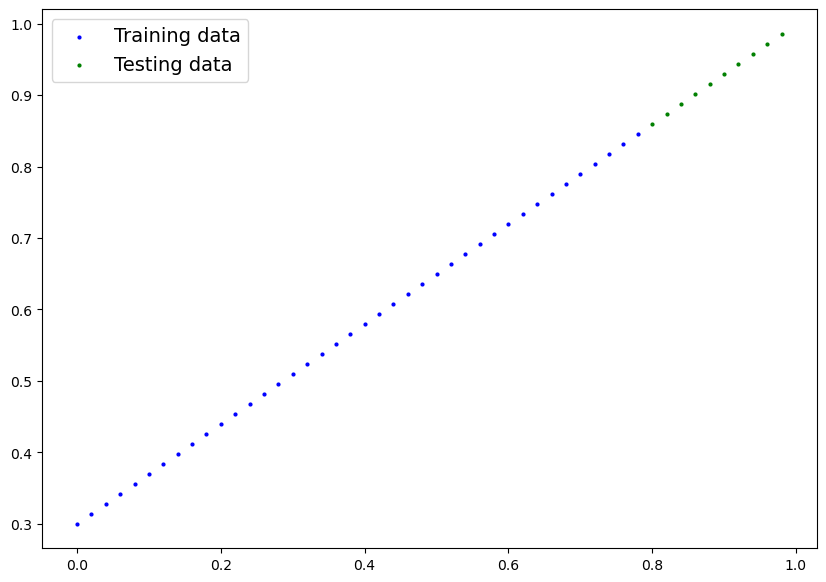

In [60]:
plot_predictions()

2. Building our first model in PyTorch
This is very exciting... let's do it!

We're going to be building classes throughout the course so get better familiar with these...

What our model does:

Start with random values (weight and & bias)
Look for Training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the values).
How does it do so?

Through two main algorithms:

Gradient descent -> required_grads=True
Backpropagation

In [128]:
 #Create linear regression model class, first PyTorch linear progression model
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch imports from nn.Module neural networks.
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, # <- Start with a random weight and try to adjust it to the ideal weight
                                               requires_grad=True, # <- Can this parameter be updated by a gradient descent?
                                               dtype=torch.float)) # <- PyTorch loves this data type torch.float32
        
        self.bias = nn.Parameter(torch.rand(1, # <- Start with a random bias and try to adjust it to the ideal bias
                                             requires_grad=True, # <- Can this parameter be updated by a gradient descent?
                                             dtype=torch.float)) # <- PyTorch loves this data type torch.float32...
        
    # Forward method to define the computation
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is linear regression formula

PyTorch model building essentials
* torch.nn - contains all the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often PyTorch layer from torch.nn will set these for us
* torch.nn Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwrite forward() this method defines what happens in the forward computation.

Checking the contents of our PyTorch Module

Now we've check our model or what's inside using our model .parameters()

In [62]:
# Just getting random value
torch.randn(1)

tensor([0.4740])

torch.randn(1)

In [63]:
# Create a random seed, to keep the numbers consistent.
#torch.manual_seed(42)

# Create an instance of LinearRegression class
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.2566], requires_grad=True),
 Parameter containing:
 tensor([0.7936], requires_grad=True)]

In [64]:
# List the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.2566])), ('bias', tensor([0.7936]))])

In [65]:
weight, bias

(0.7, 0.3)

In [66]:
X_test, y_test
print(f"X_test {X_test}")
print(f"y_test {y_test}")

X_test tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
y_test tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


# Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the forward() method.

In [67]:
# Make predictions with model with inference mode
# Inference mode disables required_grads are keeping less track of data good for speed but not accuracy.
# Think about Inference mode for larger mode, torch.no_grad is old but is in old code.
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.9989],
        [1.0040],
        [1.0092],
        [1.0143],
        [1.0194],
        [1.0246],
        [1.0297],
        [1.0348],
        [1.0400],
        [1.0451]])

In [68]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

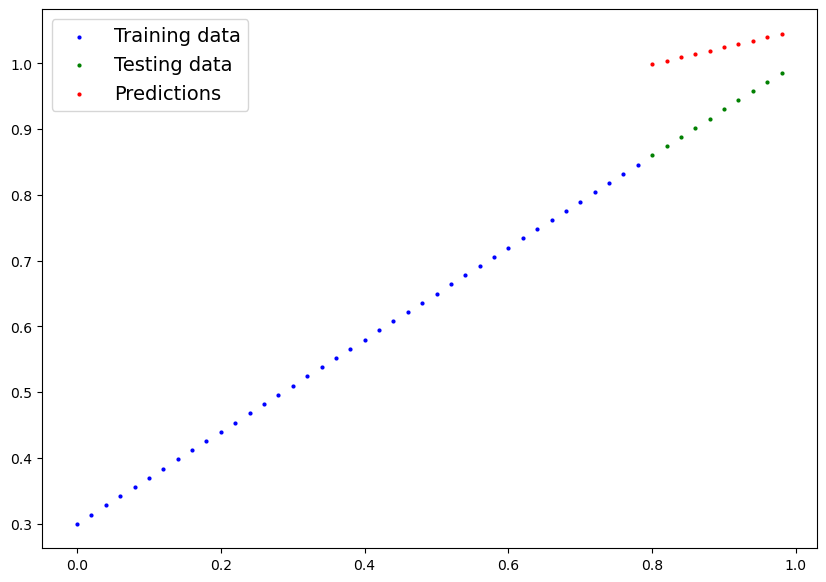

In [69]:
# Visualize, visualize, visualize
plot_predictions(predictions=y_preds)

## 3. Training a model 

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a
loss function.   

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function. 

Things we need to train:
  
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters. (e.g. weight & bias in our case) to improve the loss function. (Where the red dots will land.)

* Inside the optimizer you'll often have to set two parameters:
* params - the model parameters you'd like to optimize for example params-model_0.parameters()
* lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes)
* Hyperparameters are parameters that we set.

And specifically for PyTorch, we need:
* A training loop
* A testing loog

In [70]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.2566])), ('bias', tensor([0.7936]))])

In [71]:
# Setup a loss function which measures how wrong our model is.
loss_fn = nn.L1Loss()


# Setup an optimizer (stochastic gradient descent) which adjust our model's parameters to reduce the loss.
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # Check out our model's parameters (a parameter is a value that the model sets itself)



In [72]:
loss_fn

L1Loss()

Q: Which loss function and optimizer should I use?
A: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.
For example, for a regression problem (like ours), a loss function of nn.L1Loss () and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCELoss() (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch
A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's 'forward()'
functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of
each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and
improve the loss (**gradient descent**)

In [127]:
# Five major steps for training a model. 
# Random seed to keep numbers consistent
torch.manual_seed(42)
# An epoch is one loop through the data...(this is a hyperparameter because we've set it ourselves)
epochs = 100
### Training
#O. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # Pass the data through the model, this will perform the forward() method located within the model object 
    y_pred = model_0(X_train)

   # 2. Calculate the loss value (how wrong the model's predictions are)
    loss = loss_fn(y_pred, y_train)
    print(f"Loss param: {loss}")

    # 3. Zero the optimizer gradients (they accumulate every epoch, zero them to start fresh each forward pass)
    optimizer.zero_grad()

    #4. Perform backpropagation on the loss function (compute the gradient of every parameter with emall
    # requires_grad=True)
    loss.backward()

    #5. Step the optimizer (perform gradient descent) 
    optimizer.step() #by default how the optimizer changes will accumulate
                     #through the loop so... we have to zero them above in step 3 for the next iteration of
                     #the loop
    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers) 
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code torch.inference is faster though
        # 1. Do the forward pass
        test_pred = model_0(X_test)
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}| Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
        print(f"Model state dict: {model_0.state_dict()}")

Loss param: 0.03357194364070892
Epoch: 0| Loss: 0.03357194364070892 | Test loss: 0.07740829139947891
Model state dict: OrderedDict([('weights', tensor([0.5348])), ('bias', tensor([0.3696]))])
Loss param: 0.033235352486371994
Loss param: 0.03288674354553223
Loss param: 0.03254634514451027
Loss param: 0.03220153972506523
Loss param: 0.031857334077358246
Loss param: 0.031516335904598236
Loss param: 0.031168321147561073
Loss param: 0.03083113394677639
Loss param: 0.030482137575745583
Loss param: 0.03014310821890831
Epoch: 10| Loss: 0.03014310821890831 | Test loss: 0.06982262432575226
Model state dict: OrderedDict([('weights', tensor([0.5517])), ('bias', tensor([0.3621]))])
Loss param: 0.029796937480568886
Loss param: 0.029454106464982033
Loss param: 0.02911173366010189
Loss param: 0.02876509353518486
Loss param: 0.028426531702280045
Loss param: 0.028077537193894386
Loss param: 0.027739878743886948
Loss param: 0.027392327785491943
Loss param: 0.027050873264670372
Loss param: 0.0267071314156

In [122]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5330])), ('bias', tensor([0.3701]))])

In [123]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [124]:
weight, bias

(0.7, 0.3)

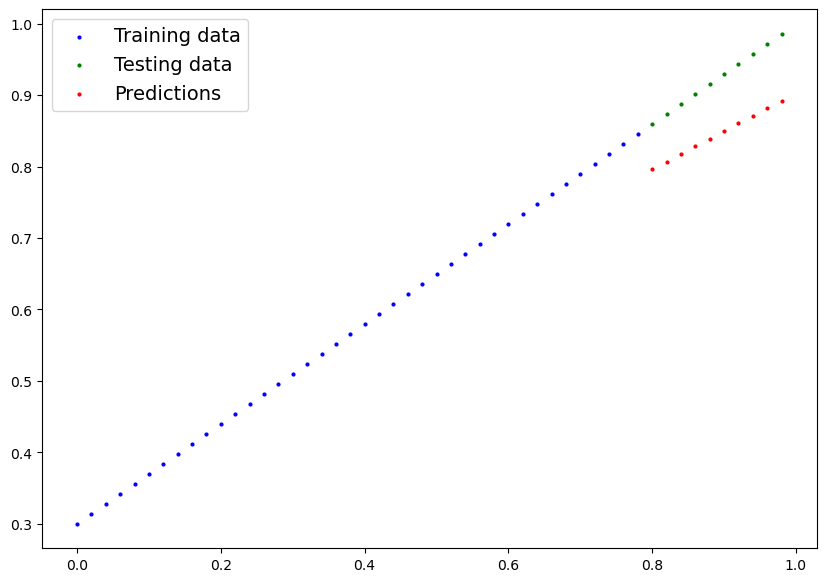

In [126]:
plot_predictions(predictions=y_preds)

In [78]:
# # My training loop

# # Number of epochs 
# epochs = 1

# ### Training
# # 0. Loop through data
# for epoch in range(epochs):
#     # Set the model to training mode
#     model_0.train()

# # 1. Forward Pass
#     y_pred = model_0(X_train)

# # 2. Calculate the loss
#     loss = loss_fn(y_pred, y_train) 

# # 3. Optimizer zero grad
#     optimizer.zero_grad()
    
# # 4. Losses backward
#     loss.backward()

# # 5. Optimizer step
#     optimizer.step()

# model_0.eval()



In [ ]:
# Start at 7:00:00 in the video